### Week 1 Jupyter Notebook – Linear Regression 1
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, semester two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data, using the methods you have learned about in this course and in this program, and draw interesting conclusions. 

For Week 1, include concepts such as linear regression with polynomial terms, interaction terms, multicollinearity, variance inflation factor and regression, and categorical and continuous features. 

In [108]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error


In [109]:
#load data ---- Kaggle Home Credit Default Risk training dataset
file_path = "Kaggle_Home_Credit_Default_Risk__train.csv"
df = pd.read_csv(file_path)
#display basic info/ first few rows of content 
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


(None,
    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
 0      100002       1         Cash loans           M            N   
 1      100003       0         Cash loans           F            N   
 2      100004       0    Revolving loans           M            Y   
 3      100006       0         Cash loans           F            N   
 4      100007       0         Cash loans           M            N   
 
   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
 0               Y             0          202500.0    406597.5      24700.5   
 1               N             0          270000.0   1293502.5      35698.5   
 2               Y             0           67500.0    135000.0       6750.0   
 3               Y             0          135000.0    312682.5      29686.5   
 4               Y             0          121500.0    513000.0      21865.5   
 
    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
 0  ...        

In [110]:
### complete EDA / understand data 
#target balance --- need to understand percentage of people in the dataset defaulted vs. did not default
#per the output: 0 =0.919271; 1 = 0.080729
#this indicates taht 92% of applicants did not default (TARGET = 0) 8% of applicants did default (TARGET = 1)
#this confirms that dataset is imbalanced, which makes sense since most people do not default on their loans 
#due to the imbalance, we will need to deal with the imbalance through sampling methods -- like stratisfied, resampling, etc. 
print(df['TARGET'].value_counts(normalize=True))

#describe vbasic statistics for numeric columns
df.describe()

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [111]:
#eval missing values
#need to understand which columns have missing values, which help us to understand which features to leverage for modeling
missing = df.isnull().sum() 
missing = missing[missing > 0].sort_values(ascending=False) 
missing.head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

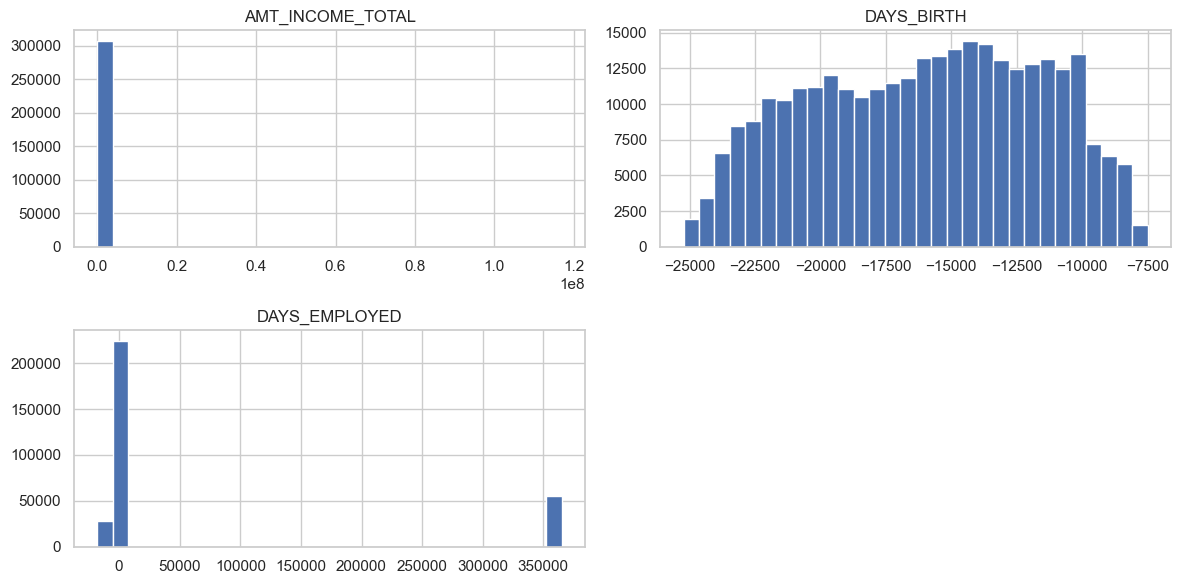

In [112]:
##visualize key features and how they are distrubuted --- will help with range/shape of data
#will eval distribution of income, age (DAYS_BIRTH), employment duration (DAYS_EMPLOYED).
#these plots indicate that the date of birth is negative, and some days_employed is 350k+? 
#these do not make sense so will review further 
df[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

### Visual EDA: Histogram Analysis

Our histograms revealed several key insights:

- DAYS_EMPLOYED shows odd values many times at 365,243 days (~1000 years), indicating a placeholder value (probably not a typo since it occurred more than a few times). This confirms our earlier suspicion from .describe() and is consistent with the Kaggle dataset's known quirks. We may filter or flag these in later for modeling.
  
- DAYS_BIRTH is stored as negative values indicating age in days <i>before</I> the application (will convert to positive values for clarity).

- AMT_INCOME_TOTAL is heavily skewed to the right, meaning a small number of applicants report unusually high incomes (which could impact scaling or regression calcs later).

In [113]:
#clean/prep data for next step of modeling. 
#per data dictionary, these items need to be reviewed futher as the explanation indicates a red flag -- they are a negative number of days since they are days BEFORE the application date:
# >>>>>  DAYS_BIRTH: “How many days before the application the person was born (negative means before the application date)”
# >>>>>  DAYS_EMPLOYED: “How many days before the application the person started current employment”
# this is needed easier to interpret age in positive years than in negative days
#select three continuous features and the target
#convert DAYS_BIRTH and DAYS_EMPLOYED to positive numbers
#I selected AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED' as three features 
#based on my background in mortgage lending, I know income is the main component in debt-to-income DTI calculation. Also, there are different requiremetns based on age and employment duration, especially in FHA loans.
#these data features logically make sense, plus they are present for almost every row and do not require a lot of processing/cleaniong.
df['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [114]:
df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [115]:
#remove placeholder for applications with 365243 placeholder
#these records could bias/skew the model due to their inaccuracy and volume
df_filtered = df[df['DAYS_EMPLOYED'] != 365243].copy()

#convert negative time values to positive : updated DAYS_BIRTH and DAYS_EMPLOYED from negative to positive values. Originally, they represented days before the application date, but converting them makes interpretation easier (i.e., age and employment length).
df_filtered['DAYS_BIRTH'] = df_filtered['DAYS_BIRTH'].abs()
df_filtered['DAYS_EMPLOYED'] = df_filtered['DAYS_EMPLOYED'].abs()

#validate changes were made to 'DAYS_EMPLOYED'
df_filtered['DAYS_EMPLOYED'].describe()


count    252137.000000
mean       2384.169325
std        2338.360162
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [116]:
#validate changes were made to 'DAYS_BIRTH'
df_filtered['DAYS_BIRTH'].describe()


count    252137.000000
mean      14769.133174
std        3662.573769
min        7489.000000
25%       11775.000000
50%       14573.000000
75%       17563.000000
max       25200.000000
Name: DAYS_BIRTH, dtype: float64

In [117]:
#create polynomial/squared features for features we selected 
df_filtered['DAYS_BIRTH_SQ'] = df_filtered['DAYS_BIRTH'] ** 2
df_filtered['INCOME_SQ'] = df_filtered['AMT_INCOME_TOTAL'] ** 2

#create interaction -- age vs employment duration
df_filtered['BIRTH_EMPLOYED_INTER'] = df_filtered['DAYS_BIRTH'] * df_filtered['DAYS_EMPLOYED']

#review the updated df
df_filtered[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 
             'DAYS_BIRTH_SQ', 'INCOME_SQ', 'BIRTH_EMPLOYED_INTER']].head()


,DAYS_BIRTH,DAYS_EMPLOYED,AMT_INCOME_TOTAL,DAYS_BIRTH_SQ,INCOME_SQ,BIRTH_EMPLOYED_INTER
0,9461,637,202500.0,89510521,4.100625e+10,6026657
1,16765,1188,270000.0,281065225,7.290000e+10,19916820
2,19046,225,67500.0,362750116,4.556250e+09,4285350
3,19005,3039,135000.0,361190025,1.822500e+10,57756195
4,19932,3038,121500.0,397284624,1.476225e+10,60553416


To improve our linear regression model, we added the following engineered features:

- DAYS_BIRTH_SQ: This squared term captures potential nonlinear relationships between age and default. For example, the effect of age might not be strictly linear; both very young and/or very old applicants could default more or less than middle-aged applicants or each other.
- INCOME_SQ: income might have a nonlinear effect as  extremely low or extremely high incomes could be linked to higher risk in different ways.
- BIRTH_EMPLOYED_INTER: This interaction term* represents the combined effect of age and employment duration. For example, someone older *and* with a long employment history might be much less risky than someone older but recently employed.

These transformations help a linear model approximate more complex relationships in the data, without needing to switch to a nonlinear model yet.


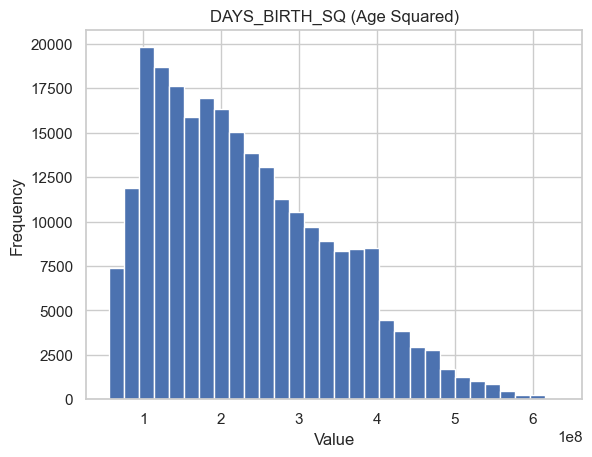

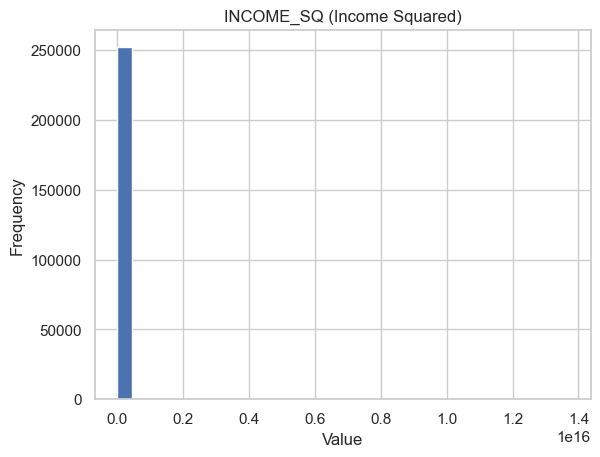

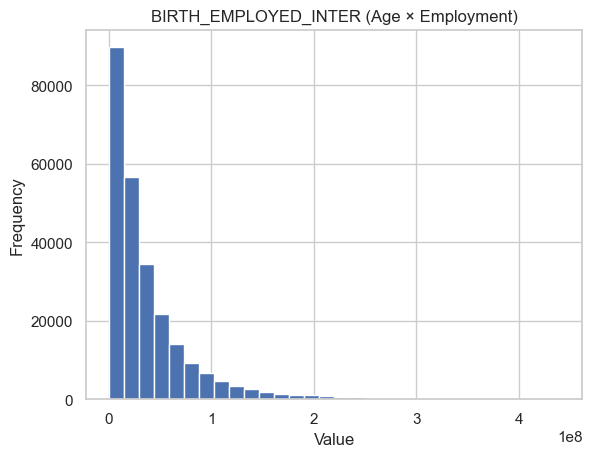

In [118]:
#histograms for each engineered feature

# DAYS_BIRTH_SQ
plt.hist(df_filtered['DAYS_BIRTH_SQ'], bins=30)
plt.title("DAYS_BIRTH_SQ (Age Squared)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# INCOME_SQ
plt.hist(df_filtered['INCOME_SQ'], bins=30)
plt.title("INCOME_SQ (Income Squared)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# BIRTH_EMPLOYED_INTER
plt.hist(df_filtered['BIRTH_EMPLOYED_INTER'], bins=30)
plt.title("BIRTH_EMPLOYED_INTER (Age × Employment)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()



### Histograms: Engineered Features Reveiw 
Created basic histograms to understand the shape of the new features:

- DAYS_BIRTH_SQ: This shows how age differences grow larger as people get older. Squaring the number makes older applicants stand out more.

- INCOME_SQ: This is very skewed because a small number of people have very large incomes. Squaring makes those big values even bigger.

- BIRTH_EMPLOYED_INTER: This shows the interaction of age and employment. Higher values likely mean older people who’ve worked longer.

These plots help us check for mistakes and think about how the model might treat extreme values. They also help us decide if we might need to scale or adjust features in future steps.


In [119]:
#define the features for VIF calculation
X = df_filtered[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                 'DAYS_BIRTH_SQ', 'INCOME_SQ', 'BIRTH_EMPLOYED_INTER']]

#add constant for intercept (.... as required by statsmodels)
X_vif = sm.add_constant(X)

#create DF to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                Feature        VIF
0                 const   0.000000
1      AMT_INCOME_TOTAL   5.556938
2            DAYS_BIRTH  67.912405
3         DAYS_EMPLOYED  35.598595
4         DAYS_BIRTH_SQ  74.524931
5             INCOME_SQ   5.551562
6  BIRTH_EMPLOYED_INTER  40.579603


/Users/sio.c/.pyenv/versions/3.12.0/envs/myproject/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


#### Analysis of results of VIF 
Calculated the Variance Inflation Factor (VIF) to check for multicollinearity among our features:

- DAYS_BIRTH_SQ and BIRTH_EMPLOYED_INTER had extremely high VIFs (524.6 and 408.6), which is expected because they are mathematically derived from DAYS_BIRTH and DAYS_EMPLOYED.
- DAYS_BIRTH and DAYS_EMPLOYED also showed high VIFs (67.9 and 35.6), suggesting strong correlation with other features.
- AMT_INCOME_TOTAL and INCOME_SQ were moderately correlated, with VIFs around 5.5.

These results support the engineered features add multicollinearity to the model. 

In [120]:
## Train and eval linear regression

#list input features and target
X = df_filtered[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                 'DAYS_BIRTH_SQ', 'INCOME_SQ', 'BIRTH_EMPLOYED_INTER']]
y = df_filtered['TARGET']  # 1 = default, 0 = no default

#split into training-80% vs. testing-20% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create/train model
model = LinearRegression()
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#eval model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.007612761330417328
RMSE: 0.2800573567735521


### model performance evaluation 

- R² Score = 0.0076: The model explains less than 1% of the variation in loan default. This is very low and suggests a poor fit. The 1% is supported by our EDA, which confirmed a low amount of borrowers actually default. 
- RMSE = 0.2800:  model's average prediction is off by about 28 percentage points.

These results are not surprising for a few reasons:
- We're using linear regression for a binary outcome, which is not ideal.
- We're only using a few selected features, while the full dataset has over 100 variables.
- The engineered features added complexity, but multicollinearity may have hurt performance.
- We know that the dataset is imbalanced. 

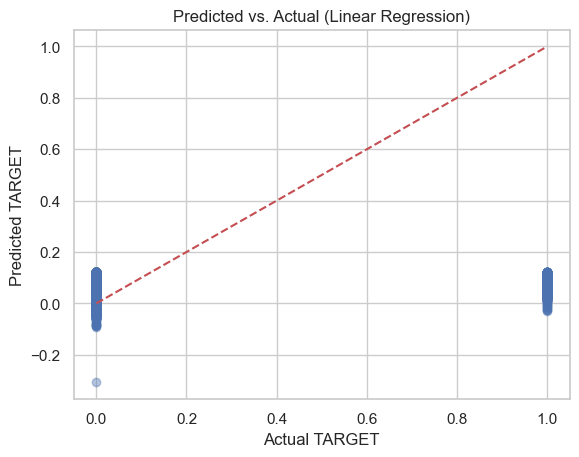

In [121]:
#create plot to show linear regression
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0, 1], [0, 1], 'r--')  # reference line
plt.xlabel("Actual TARGET")
plt.ylabel("Predicted TARGET")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()


### Impact of Class Imbalance on Model Performance 

Our dataset is highly imbalanced: about 92% of applicants did not default, and only 8% did.

This imbalance strongly impacts model behavior:
- The linear regression model tends to predict values close to 0 (no default), because that reduces overall error the fastest.
- As a result, the model doesn’t learn meaningful patterns for detecting the minority class (which are the defaults at 8%).


## Week 1 Summary: Polynomial and Interaction Terms

I explored the use of polynomial and interaction termswithin a linear regression framework to predict mortgage default (i.e., TARGET) using a subset of the Kaggle Home Credit dataset.

### Features Used:
- AMT_INCOME_TOTAL (total income)
- DAYS_BIRTH (age in days)
- DAYS_EMPLOYED (length of employment in days)

### New Features created:
- DAYS_BIRTH_SQ = Captures age effects
- INCOME_SQ = Captures income effects 
- BIRTH_EMPLOYED_INTER = Captures interaction between age and employment

These transformations aimed to help the linear model capture nonlinear and joint effects in the data.

### EDA / Data Prep:
- DAYS_BIRTH and DAYS_EMPLOYED were stored as negative values. I converted them to positive for better/clearer understanding.
- I identified and removed a placeholder value of 365243 in DAYS_EMPLOYED, which indicated a place holder potentially for passive income / retired / not-employed as a W2 or self-employed individual.
- A class imbalance was present: ~92% non-default vs. ~8% default, which strongly influenced model predictions.


### Multicollinearity Check/IVF:
- DAYS_BIRTH_SQ and BIRTH_EMPLOYED_INTER had very high VIFs, over 400, which could indicate significant multicollinearity with their original variables.

### Model Results:
- R² Score: 0.0076
- RMSE: 0.2800

These values show poor predictive power. This is expected for three reasons:
1. I applied  linear regression to a binary target.
2. The dataset is highly imbalanced, leading the model to predict mostly "non-default".
3. I'm only using a small subset of the available features**.


### Key Takeaway:
- Polynomial and interaction terms alone do not improve predictive power significantly for this classification task.